In [1]:
modulepath = '/Users/mo2016/Documents/modelling/6eq/modules'

import sys
sys.path.append(modulepath)

import time
import scipy.io
import numpy as np
import pickle
from numpy import linalg as LA
from parametercombination_analysis import *
# from testmodulefolder import printa
from randomfunctions import *
# from class_circuit_eq import circuit1_eq
import datetime
from numerical_solvers_variableboundary import *
from dispersionrelation_functions import *
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import decimal
from scipy import signal
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
from math import isclose
path =  '/Users/mo2016/Documents/modelling/6eq/numerical_confocal'
PCApath = '/Users/mo2016/Documents/modelling/6eq/PCA'
parametersearchpath = '/Users/mo2016/Documents/modelling/6eq/parameter_space_search/'


# Wavelenght and dispersion height distributions

If stability test fails:
- increase L
- lower J
- lower T
- increase N

    

In [31]:
turing_df= pickle.load( open(parametersearchpath +  '/results/turing_dataframes/circuit2robustness4_turingI_monostable_df.pkl', "rb" ) )
nonturing_df= pickle.load( open(parametersearchpath +  '/results/turing_dataframes/loguniform_dataframes/df_loguniform_30.pkl', "rb" ) )

circuit_n=2
mechanism = 'turing'
par_ID = 16 #1,5,11,21,22,32,35,37,
boundary_coef=1

if mechanism == 'turing':
    par_dict = turing_df.iloc[par_ID].to_dict()
elif mechanism =='nonturing':
    par_dict = nonturing_df.iloc[par_ID].to_dict()

turing_output= detailed_turing_analysis_dict(par_dict, circuit_n)


steadystates,eigenvalues =turing_output[0][0], turing_output[4][0]
print ( 'wavelenght = ' + str(wavelenght_from_dispersion(eigenvalues)))
print ( 'dispersion height= ' + str(turing_output[2]))


[1.275e-01 1.976e-02 3.044e+01 1.692e+00 6.031e+01 1.515e-01]
Turing I pattern
wavelenght = 0.2607561929595828
dispersion height= [(0.07728104884414766+0j)]


In [3]:
par_dict

{'Va': 27.54920370207845,
 'Vb': 203.5205497325214,
 'Vc': 119.57146505949471,
 'Vd': 233.10822395077938,
 'Ve': 23.603188199935882,
 'Vf': 12.939632824864457,
 'ba': 0.01,
 'bb': 0.01,
 'bc': 0.01,
 'bd': 0.01,
 'be': 0.01,
 'bf': 0.01,
 'd_A': 1.1,
 'd_B': 0.001,
 'kaa': 1.074519446883396,
 'kbd': 0.5829265919451819,
 'kce': 10000.0,
 'kda': 0.3528296333928256,
 'keb': 15.231020696782636,
 'kee': 0.5087852697059241,
 'kfe': 0.12859993523567886,
 'mua': 9.08132926038683,
 'mulva': 0.16404972757945052,
 'n': 2.0}

# 1D simulation

In [35]:
L =7#total leght of space simulated 
J =L*2#number of equally spaced gridpoints in space domain (larger J means more spatial precision(tends towards continuum solution) )

T =500#total lenght of time simulated
t_gridpoints = t_gridpoints_stability(L,J,T)#number of equally spaced gridpoints in domain (larger N means more temporal precision (tends towards continuum solution) )
N = T*t_gridpoints

print('N = ' + str(T) + '*' + str(t_gridpoints) + '=' + str(N))
stability_test(L,J,T,N) #if stability test fails, oscillations might occur

dx = float(L)/float(J-1) # our one unit domain is divided into intervals of lenght dx
x_grid = numpy.array([j*dx for j in range(J)]) #array with positions in our grid

N = 500*6=3000
Not acceptable stability ratio: 0.5750216058414029


100%|██████████| 2999/2999 [00:00<00:00, 6711.29it/s]


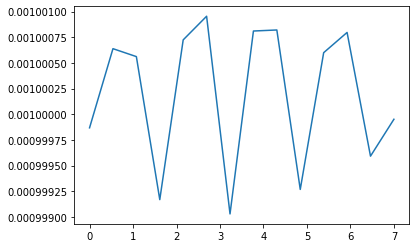

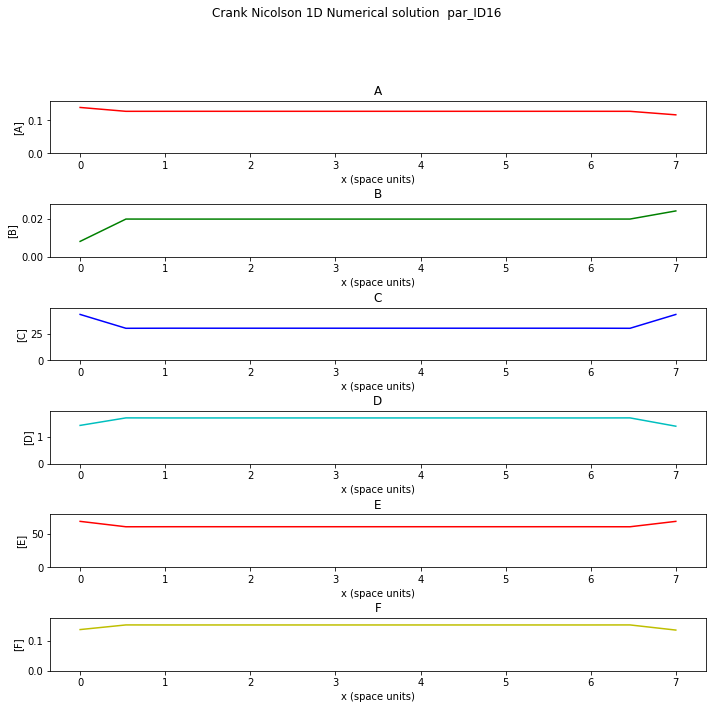

In [36]:
initial_condition = [0.001,0.001,0.001,0.001,0.001,0.001]
records,final_concentration,grids = crank_nicolson(par_dict,initial_condition,L,J,T,N,circuit_n, boundary_coef=boundary_coef)
plot_1D_final_concentration(final_concentration,grids,par_ID)


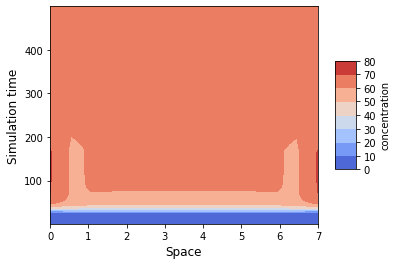

In [37]:
trim=int(N/T)*1

x,t,values = surfpattern(records,grids,morphogen=4)
surf = plt.contourf(x[trim:-1],t[trim:-1], values[trim:-1],cmap=cm.coolwarm)
plt.colorbar(surf, shrink=0.5, aspect=5,label='concentration')

plt.ylabel('Simulation time', fontsize=12)
plt.xlabel('Space', fontsize=12)
plt.show()



# 2D simulation

If stability test fails:
- increase L
- lower J
- lower T
- increase N

    

In [42]:
#### L_x =20 #total leght of space x simulated 
# L_y =L_x #total leght of space y simulated 
# J = L_x*3 #number of equally spaced gridpoints in space x domain (larger J means more spatial precision(tends towards continuum solution) )
# I = J#number of equally spaced gridpoints in space y domain (larger J means more spatial precision(tends towards continuum solution) )

L_x =7#total leght of space x simulated 
L_y =7#total leght of space y simulated 
x_gridpoints = 2
J = L_x*x_gridpoints #number of equally spaced gridpoints in space x domain (larger J means more spatial precision(tends towards continuum solution) )
I = L_y*x_gridpoints#number of equally spaced gridpoints in space y domain (larger J means more spatial precision(tends towards continuum solution) )


T =500#400#total lenght of time simulated
t_gridpoints = t_gridpoints_stability(L_x,J,T)#number of equally spaced gridpoints in domain (larger N means more temporal precision (tends towards continuum solution) )
N = T*t_gridpoints

print('N = ' + str(T) + '*' + str(x_gridpoints) + '=' + str(N))
stability_test(L_x,J,T,N) #if stability test fails, oscillations might occur

shape_name = 'circle'
filename = 'ADI_circuit%rboundary%r_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,boundary_coef, shape_name, mechanism,par_ID,L_x,J,T,N)




N = 500*2=3000
Not acceptable stability ratio: 0.5750216058414029


100%|██████████| 3000/3000 [00:17<00:00, 171.63it/s]


<IPython.core.display.Javascript object>


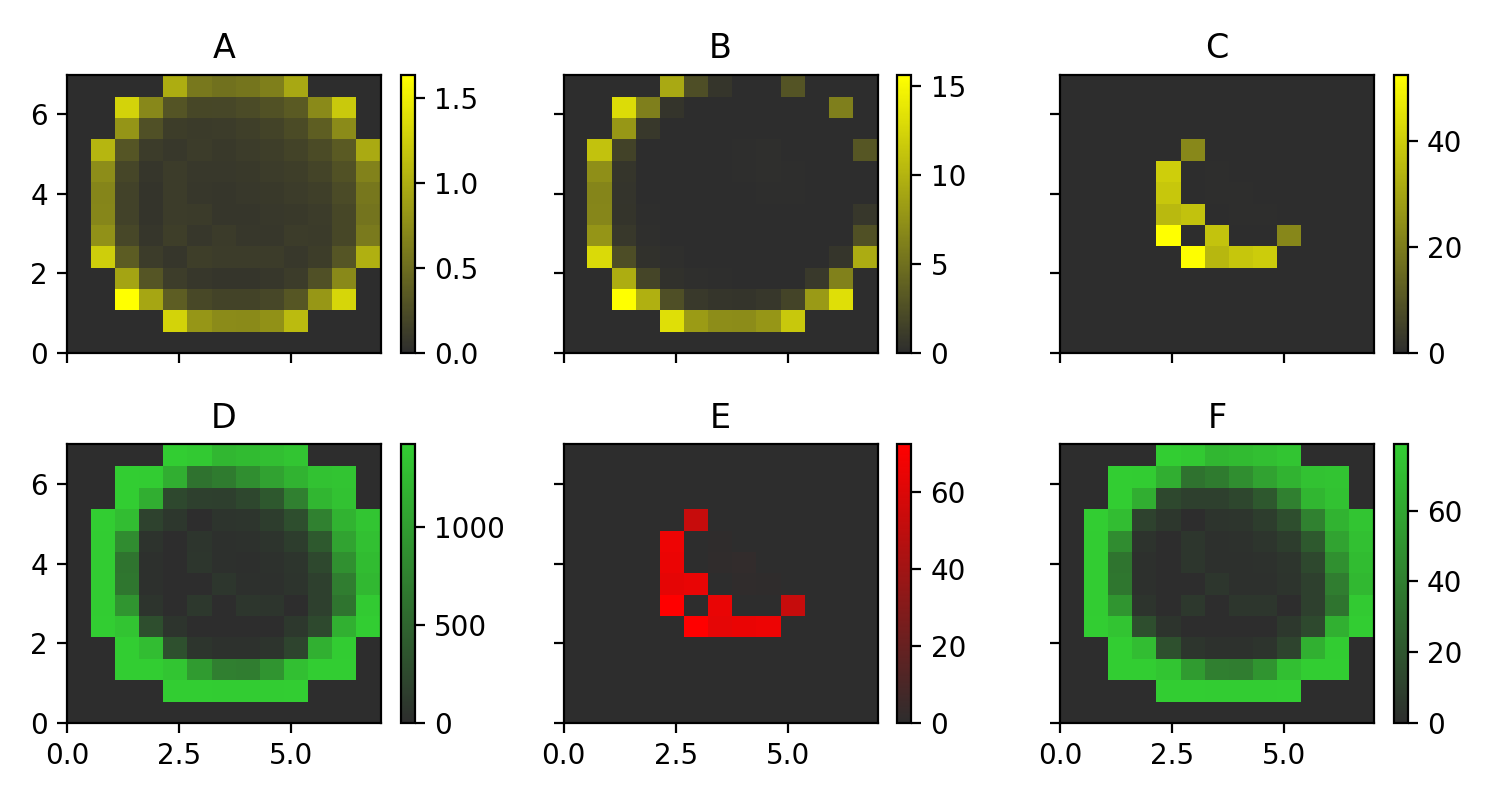

In [43]:
initial_condition = [0.001,0.001,0.001,0.001,0.001,0.001]
# records,final_concentration,grids = adi(par_dict,initial_condition,L_x,L_y,J,I,T,N, circuit_n,boundary_coef=0)
records,final_concentration,grids = adi_shape(par_dict,initial_condition,L_x,L_y,J,I,T,N,circuit_n, shape_name=shape_name,boundary_coef=1)

plot_2D_final_concentration(final_concentration,grids)



In [44]:
save_numerical_results(records, grids, filename,path)

time= 877.082193851471


In [45]:
pickle_in_results = open(path + "/results/simulation/records_%s.pkl" % filename,"rb")
records = pickle.load(pickle_in_results)
pickle_in_grids = open(path + "/results/simulation/grids_%s.pkl"%filename,"rb")
grids = pickle.load(pickle_in_grids)
final_concentration = []
for count,matrix in enumerate(records):
    final_concentration.append(matrix[:,:,-1])

final_concentration[-2][12]

    




array([0.   , 0.   , 0.   , 0.   , 0.061, 0.061, 0.061, 0.061, 0.061,
       0.061, 0.   , 0.   , 0.   , 0.   ])

In [46]:
plot_redgreen_contrast(final_concentration,x_gridpoints)
plt.ylabel('y axis (mm)', size=16)
plt.xlabel('x axis (mm)', size=16)
plt.yticks(size=15)
plt.xticks(size=15)



(array([ 0. ,  3.5,  7. , 10.5]), <a list of 4 Text xticklabel objects>)

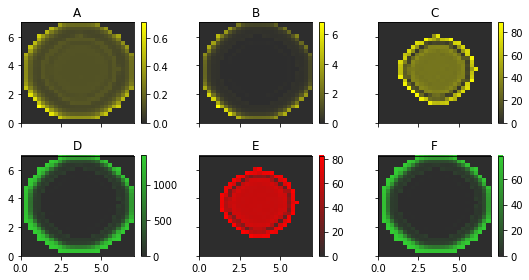

In [6]:
plot_2D_final_concentration(final_concentration,grids)



<IPython.core.display.Javascript object>


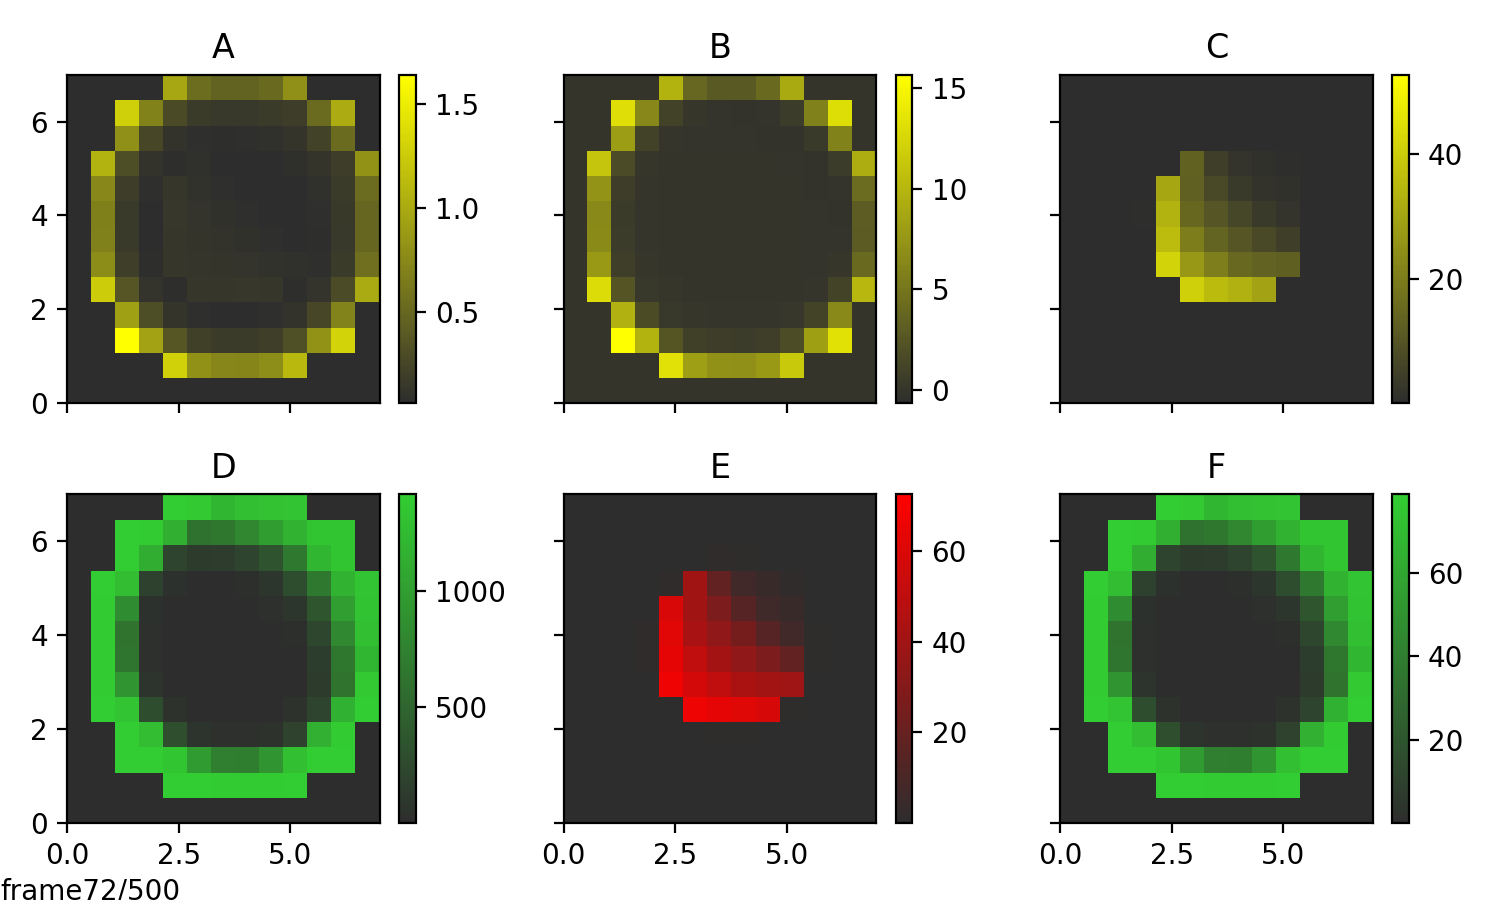

In [47]:
sizesample = int(T)
a_reduced, b_reduced, c_reduced, d_reduced, e_reduced, f_reduced, x_grid, y_grid = records[0], records[1], records[2], records[3], records[4], records[5], grids[0], grids[1]
%matplotlib notebook

fig, axs = plt.subplots(2,3,figsize=(7.5,4.5))


black_yellow= [(45/255,45/255,45/255),(255/255,255/255,0/255)]
black_red = [(45/255,45/255,45/255),(255/255,0/255,0/255)]
black_green = [(45/255,45/255,45/255),(50/255,205/255,50/255)]
yellow_cmap = LinearSegmentedColormap.from_list('black_yellow',black_yellow)
red_cmap = LinearSegmentedColormap.from_list('black_red',black_red)
green_cmap = LinearSegmentedColormap.from_list('black_green',black_green)

    
i=0
im1 = axs[0,0].pcolormesh(x_grid, y_grid, a_reduced[:,:,0],vmin = np.amin(a_reduced[:,:,-1][np.nonzero(a_reduced[:,:,-1])]), vmax = np.amax(a_reduced[:,:,-1][np.nonzero(a_reduced[:,:,-1])]), label = 'A', shading = 'flat', cmap=yellow_cmap)
im2 = axs[0,1].pcolormesh(x_grid, y_grid, b_reduced[:,:,0],vmin = np.amin(b_reduced[:,:,-1][np.nonzero(b_reduced[:,:,-1])]), vmax = np.amax(b_reduced[:,:,-1][np.nonzero(a_reduced[:,:,-1])]), label = 'B', shading = 'flat', cmap=yellow_cmap)
im3 = axs[0,2].pcolormesh(x_grid, y_grid, c_reduced[:,:,0],vmin = np.amin(c_reduced[:,:,-1][np.nonzero(c_reduced[:,:,-1])]), vmax = np.amax(c_reduced[:,:,-1][np.nonzero(a_reduced[:,:,-1])]), label = 'C', shading = 'flat', cmap=yellow_cmap)
im4 = axs[1,0].pcolormesh(x_grid, y_grid, d_reduced[:,:,0],vmin = np.amin(d_reduced[:,:,-1][np.nonzero(d_reduced[:,:,-1])]), vmax = np.amax(d_reduced[:,:,-1][np.nonzero(a_reduced[:,:,-1])]), label = 'D', shading = 'flat', cmap=green_cmap)
im5 = axs[1,1].pcolormesh(x_grid, y_grid, e_reduced[:,:,0],vmin = np.amin(e_reduced[:,:,-1][np.nonzero(e_reduced[:,:,-1])]), vmax = np.amax(e_reduced[:,:,-1][np.nonzero(a_reduced[:,:,-1])]), label = 'E', shading = 'flat', cmap=red_cmap)
im6 = axs[1,2].pcolormesh(x_grid, y_grid, f_reduced[:,:,0],vmin = np.amin(f_reduced[:,:,-1][np.nonzero(f_reduced[:,:,-1])]), vmax = np.amax(f_reduced[:,:,-1][np.nonzero(a_reduced[:,:,-1])]), label = 'F', shading = 'flat', cmap=green_cmap)



a_reduced = a_reduced[:-1, :-1]
b_reduced = b_reduced[:-1, :-1]
c_reduced = c_reduced[:-1, :-1]
d_reduced = d_reduced[:-1, :-1]
e_reduced = e_reduced[:-1, :-1]
f_reduced = f_reduced[:-1, :-1]

time_text = fig.text(0, 0,'')

for ax in axs.flat:
    ax.label_outer()

count1=0
morphogens = ('A','B','C','D','E','F')
ims = (im1,im2,im3,im4,im5,im6)
for ax in axs.flat:
    ax.set(title=morphogens[count1]) 
    fig.colorbar(ims[count1], ax=ax)

    count1+=1

fig.tight_layout()
def updatefig(*args):
    global i
    if (i<sizesample):
        i += 1
    else:
        i=0
    im1.set_array(a_reduced[:,:,i].flatten())
    im2.set_array(b_reduced[:,:,i].flatten())
    im3.set_array(c_reduced[:,:,i].flatten())
    im4.set_array(d_reduced[:,:,i].flatten())
    im5.set_array(e_reduced[:,:,i].flatten())
    im6.set_array(f_reduced[:,:,i].flatten())
    time_text.set_text('frame'+str(i)+'/'+str(sizesample))



    return im1,im2,im3,im4,im5,im6



ani = animation.FuncAnimation(fig, updatefig, interval = 10, frames = sizesample -1)




In [4]:
minimising = np.linspace(0,T-1-trim,sizesample)
minimising

NameError: name 'np' is not defined

In [5]:
int(0)

0

In [69]:
records[0][:,:,0]

array([[4.751e-04, 3.754e-04, 1.324e-03, 1.825e-03, 5.160e-04, 1.318e-03,
        6.184e-04, 1.139e-03, 1.961e-03, 4.629e-04, 1.286e-03, 1.112e-03,
        7.895e-06, 3.085e-05, 2.528e-04, 8.114e-04, 6.149e-05, 6.391e-04,
        1.301e-03, 1.025e-03, 1.355e-03, 1.027e-03, 9.214e-04, 1.885e-03,
        3.629e-04, 1.485e-03, 7.411e-04, 1.516e-04, 1.914e-04, 1.789e-03],
       [7.643e-04, 4.871e-04, 8.824e-04, 1.216e-04, 3.161e-04, 1.926e-03,
        1.122e-03, 1.329e-04, 4.626e-04, 6.982e-04, 5.017e-04, 1.105e-03,
        8.991e-04, 4.997e-04, 1.605e-03, 1.279e-03, 6.747e-04, 1.131e-03,
        1.023e-03, 1.873e-03, 1.980e-03, 2.659e-04, 8.721e-04, 1.800e-03,
        6.603e-04, 1.470e-03, 9.698e-04, 1.082e-03, 9.177e-05, 1.008e-03],
       [6.109e-05, 2.207e-04, 9.904e-04, 1.994e-04, 7.387e-04, 1.246e-03,
        2.595e-04, 9.112e-05, 1.647e-03, 5.128e-04, 2.882e-04, 1.145e-03,
        1.220e-04, 1.445e-03, 1.212e-03, 9.867e-04, 1.898e-03, 3.126e-04,
        1.146e-03, 1.140e-03, 1.106e